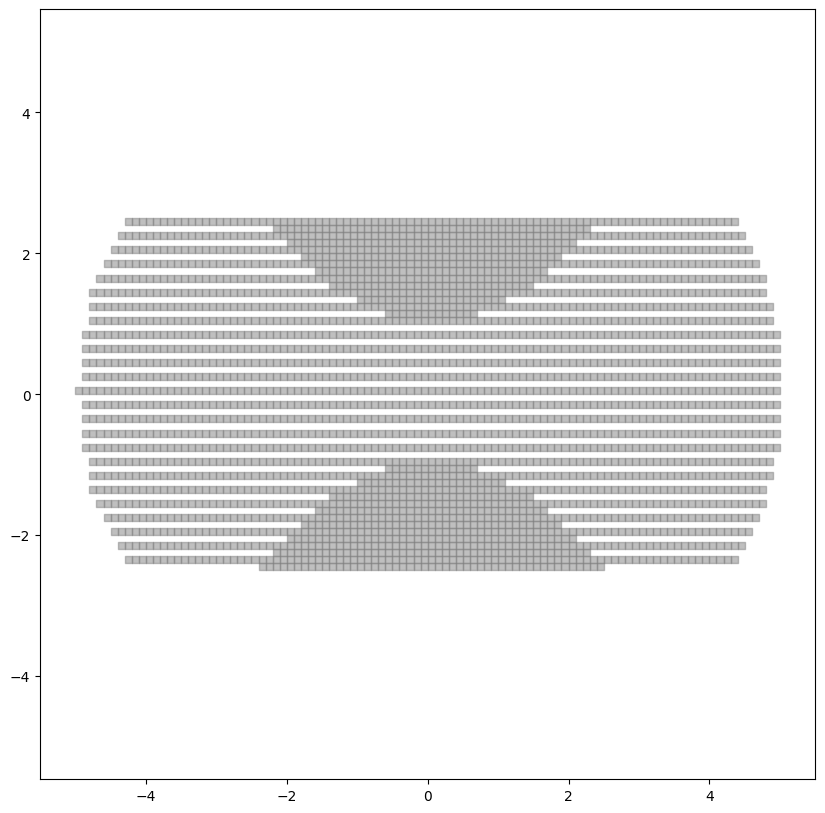

In [1]:
import numpy as np

from src.geometry.pattern_unit import (
    PatternUnit,
    Shape,
    PatternTransformation,
    PatternTransformationMatrix,
    Pattern,
)
from src.grid.visualize_points import visualize_points


count = 0  # Declare count as a global variable


def execution_count_based_shape(x, y):
    global count  # Declare count as a global variable

    def inner(x, y):
        global count  # Declare count as a global variable
        count += 1
        is_in_circle = x**2 + y**2 <= 25
        is_in_parabola = abs(y) >= x**2 / 4 + 1

        if count % 2 == 0:
            return is_in_circle
        else:
            return is_in_parabola

    return inner(x, y)


shape = Shape(
    w=10,
    h=5,
    area_functions=[
        execution_count_based_shape,
    ],
)


# create the pattern unit
pattern_unit = PatternUnit(shape, k=0.1)


visualize_points(pattern_unit.shape_matrix, k=pattern_unit.grid.k)

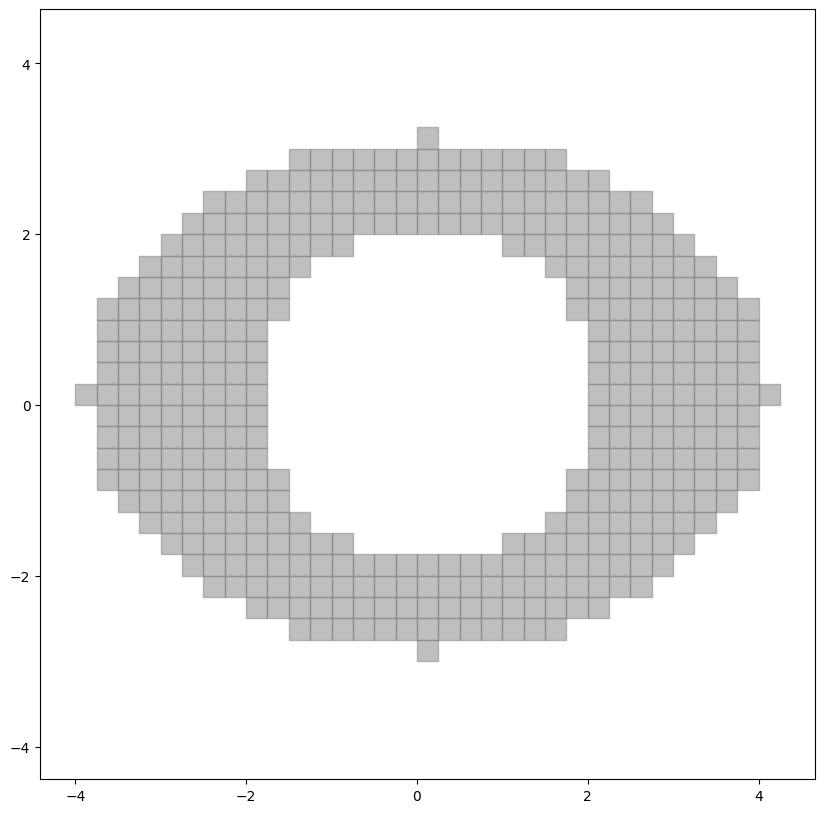

In [2]:
shape2 = Shape(
    w=10,
    h=10,
    area_functions=[
        lambda x, y: x**2 / 16 + y**2 / 9 <= 1 and x**2 + y**2 >= 4,  # Donut
    ],
)

# create the pattern unit
pattern_unit2 = PatternUnit(shape2, k=0.25)

visualize_points(pattern_unit2.shape_matrix, k=pattern_unit2.grid.k)

In [3]:
circular_transformation = PatternTransformation(
    "circular",
    dx=2.5,
    di=25,
    phi=np.pi / 8,
)


circular_transformation_vector = PatternTransformationMatrix(
    pattern_unit=pattern_unit2,
    pattern_transformation=circular_transformation,
    pattern_bound=((-100, 100), (-100, 100)),
)
circular_pattern = Pattern(
    pattern_transformation_matrix=circular_transformation_vector,
)

print(circular_pattern.pattern_matrix.shape)

# visualize_points(
#     circular_pattern.pattern_matrix,
#     k=circular_pattern.pattern_unit.grid.k,
#     fig_size=(5, 5),
# )

(42788, 2)


(378327, 2)


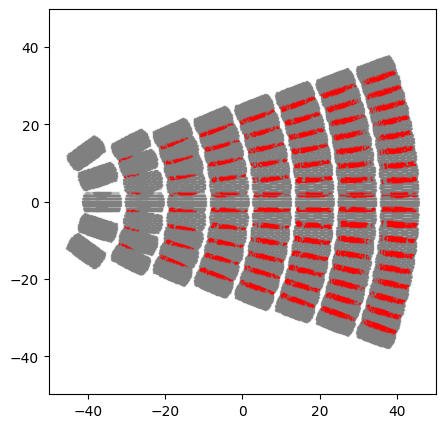

In [4]:
corn_transformation = PatternTransformation(
    "corn",
    dx=1,
    di=16.5,
    phi=np.pi / 10,
    rot_count=4,
)

corn_transformation_vector = PatternTransformationMatrix(
    pattern_unit=pattern_unit,
    pattern_transformation=corn_transformation,
    pattern_bound=((0, 100), (0, 100)),
)


corn_pattern = Pattern(
    pattern_transformation_matrix=corn_transformation_vector,
)

print(corn_pattern.pattern_matrix.shape)

visualize_points(
    corn_pattern.pattern_matrix,
    k=corn_pattern.pattern_unit.grid.k,
    fig_size=(5, 5),
)

(185655, 2)


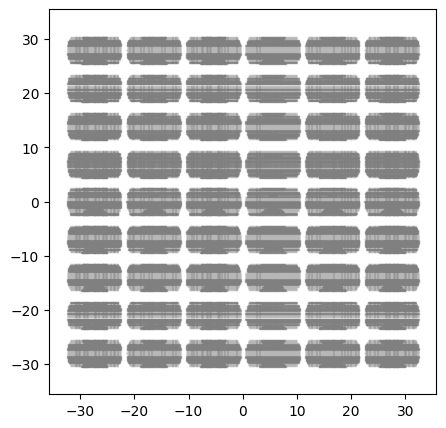

In [5]:
Dx = 1
grid_transformation = PatternTransformation("grid", dx=Dx, dy=2, di=Dx / 2)

grid_transformation_vector = PatternTransformationMatrix(
    pattern_unit=pattern_unit,
    pattern_transformation=grid_transformation,
    pattern_bound=((-30, 30), (-30, 30)),
)

grid_pattern = Pattern(
    pattern_transformation_matrix=grid_transformation_vector,
)

print(grid_pattern.pattern_matrix.shape)

visualize_points(
    grid_pattern.pattern_matrix,
    k=grid_pattern.pattern_unit.grid.k,
    fig_size=(5, 5),
)